# 1. Importation des Librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

# 2. Chargement des données

In [2]:
data = pd.read_csv('Data/Darknet_2.csv')
data.head(6)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,7/24/2015 16:09,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,7/24/2015 16:09,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,7/24/2015 16:09,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,7/24/2015 16:09,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,7/24/2015 16:09,10778451,591,400,...,0,0,0,0,1.437760e+15,3.117718e+06,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING
5,10.152.152.11-173.194.65.127-54570-443-6,10.152.152.11,54570,173.194.65.127,443,6,7/24/2015 16:10,421362,5,3,...,0,0,0,0,1.437770e+15,1.866111e+05,1.437770e+15,1.437770e+15,Non-Tor,AUDIO-STREAMING


# 3. Analyse de données

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

# 4. pretraitement des données

In [4]:
encoder = LabelEncoder()
data['Flow ID'] = encoder.fit_transform(data['Flow ID'])
data['Src IP'] = encoder.fit_transform(data['Src IP'])
data['Dst IP']=encoder.fit_transform(data['Dst IP'])
data['Label.1']=encoder.fit_transform(data['Label.1'])
data['Label']=encoder.fit_transform(data['Label'])
data['Timestamp']=encoder.fit_transform(data['Timestamp'])
print(data['Flow ID'].unique())
print(data['Src IP'].unique())
print(data['Dst IP'].unique())
print(data['Label.1'].unique())
print(data['Label'].unique())
print(data['Timestamp'].unique())

[22115 22116 22117 ... 52825 53060 52967]
[  13  907 3395 ... 1210 1403  506]
[3431 5811 1661 ...   26 2979 4504]
[ 0  2  3  4  5  6  7  9  1 10  8]
[0 1 2 3]
[2207 2208 2210 ... 1334 1348 1384]


Flow ID                        0
Src IP                         0
Src Port                       0
Dst IP                         0
Dst Port                       0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Total Length of Fwd Packet     0
Total Length of Bwd Packet     0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                  47
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Mi

<Axes: >

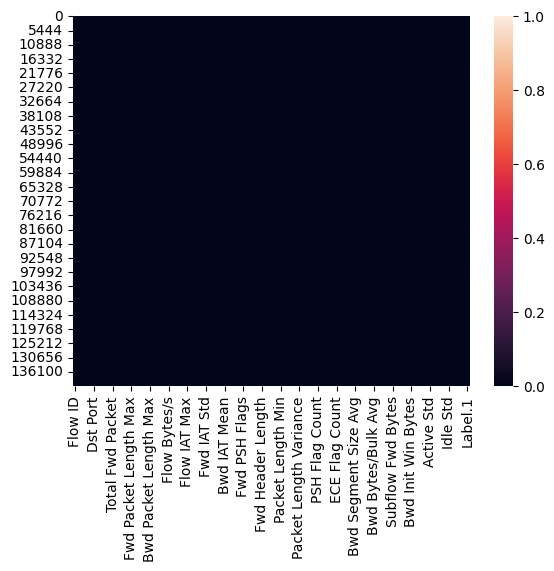

In [5]:
pd.set_option('display.max_rows', None)
print(data.isnull().sum())
sns.heatmap(data.isnull())

In [6]:
data['Flow Bytes/s'].fillna(data['Flow Bytes/s'].mean(), inplace=True)
pd.set_option('display.max_rows', None)
print(data.isnull().sum())

Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT 

# 5. Division des données

In [7]:
data.drop(columns='Label', inplace=True, axis=1)

In [8]:
X = data.drop(columns='Label.1', axis=1)
y = data.iloc[ : , -1]

print(X.shape)
print(y.shape)

(141530, 83)
(141530,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-train:", y_test.shape)

X-train: (113224, 83)
X-test: (28306, 83)
y-train: (113224,)
y-train: (28306,)


# 6. Constructrion du SNN

In [10]:
model = Sequential()
model.add(Dense(128, input_shape=(83,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,633 (84.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=75, verbose=1, validation_data=(X_test, y_test))

Epoch 1/75
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.1164 - loss: -47961706856448.0000 - val_accuracy: 0.1164 - val_loss: -78.1899
Epoch 2/75
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.1167 - loss: -98.4540 - val_accuracy: 0.1164 - val_loss: -169.1844
Epoch 3/75
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.1178 - loss: -204.2797 - val_accuracy: 0.1164 - val_loss: -339.6412
Epoch 4/75
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.1174 - loss: -389.5469 - val_accuracy: 0.1164 - val_loss: -569.6224
Epoch 5/75
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.1183 - loss: -625.9182 - val_accuracy: 0.1164 - val_loss: -849.7388
Epoch 6/75
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.1184 - loss: -921.9898 - val_accuracy: 0.1164 - val_loss: -1179.1630
Epoch 7/75
3539/3539 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.1167 - loss: -1266.6044 - val_accuracy: 0.1164 - val_loss: -1558.7467
Epoch 8/75
3539/3539 ━━━━━━━━

# 7.visualisation

In [12]:
history

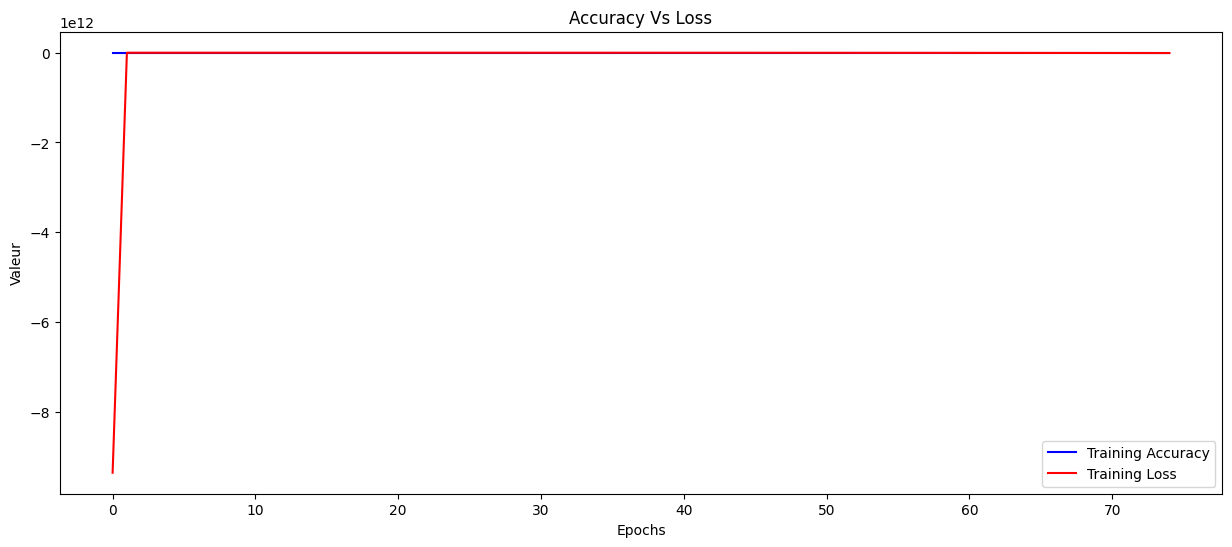

In [13]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

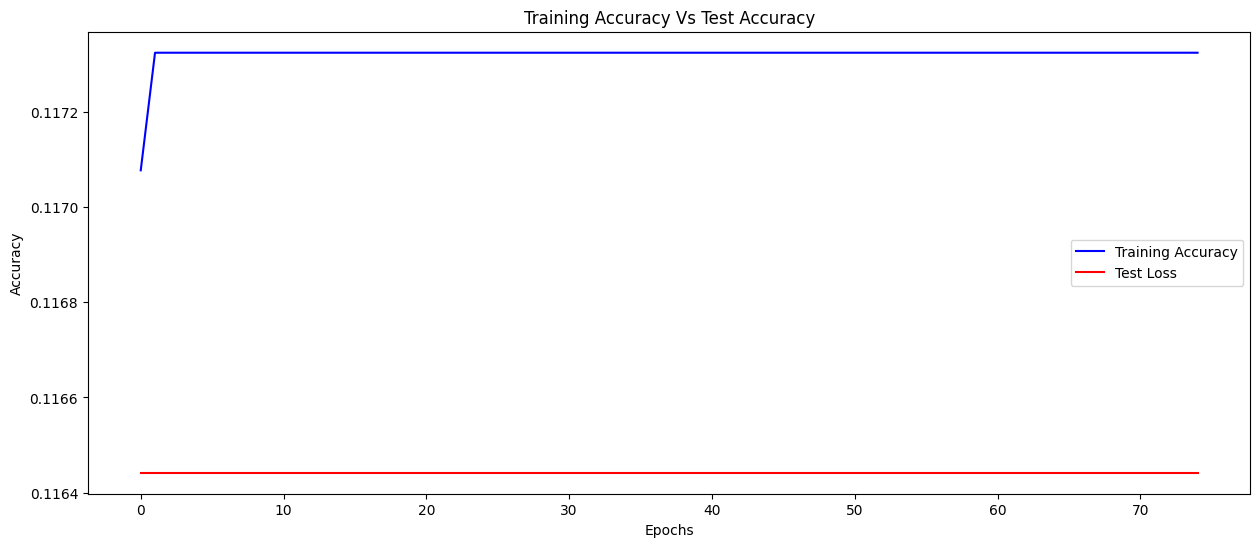

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.plot()
plt.show()

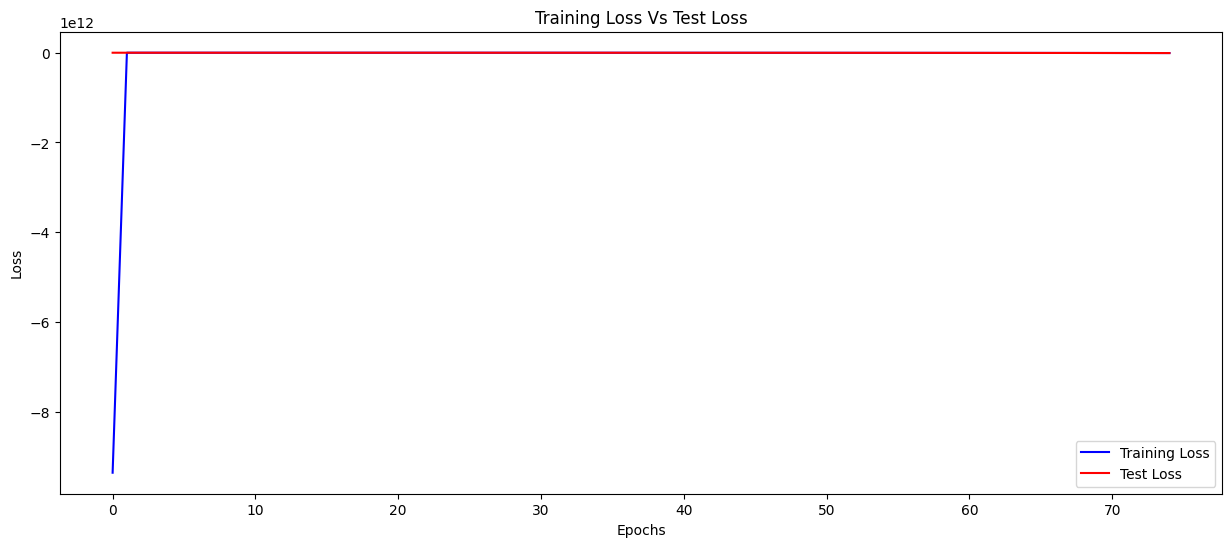

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.plot()
plt.show()

In [16]:
model.evaluate(X_test, y_test)

885/885 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1120 - loss: -7578792448.0000


[-7543585280.0, 0.1164417415857315]